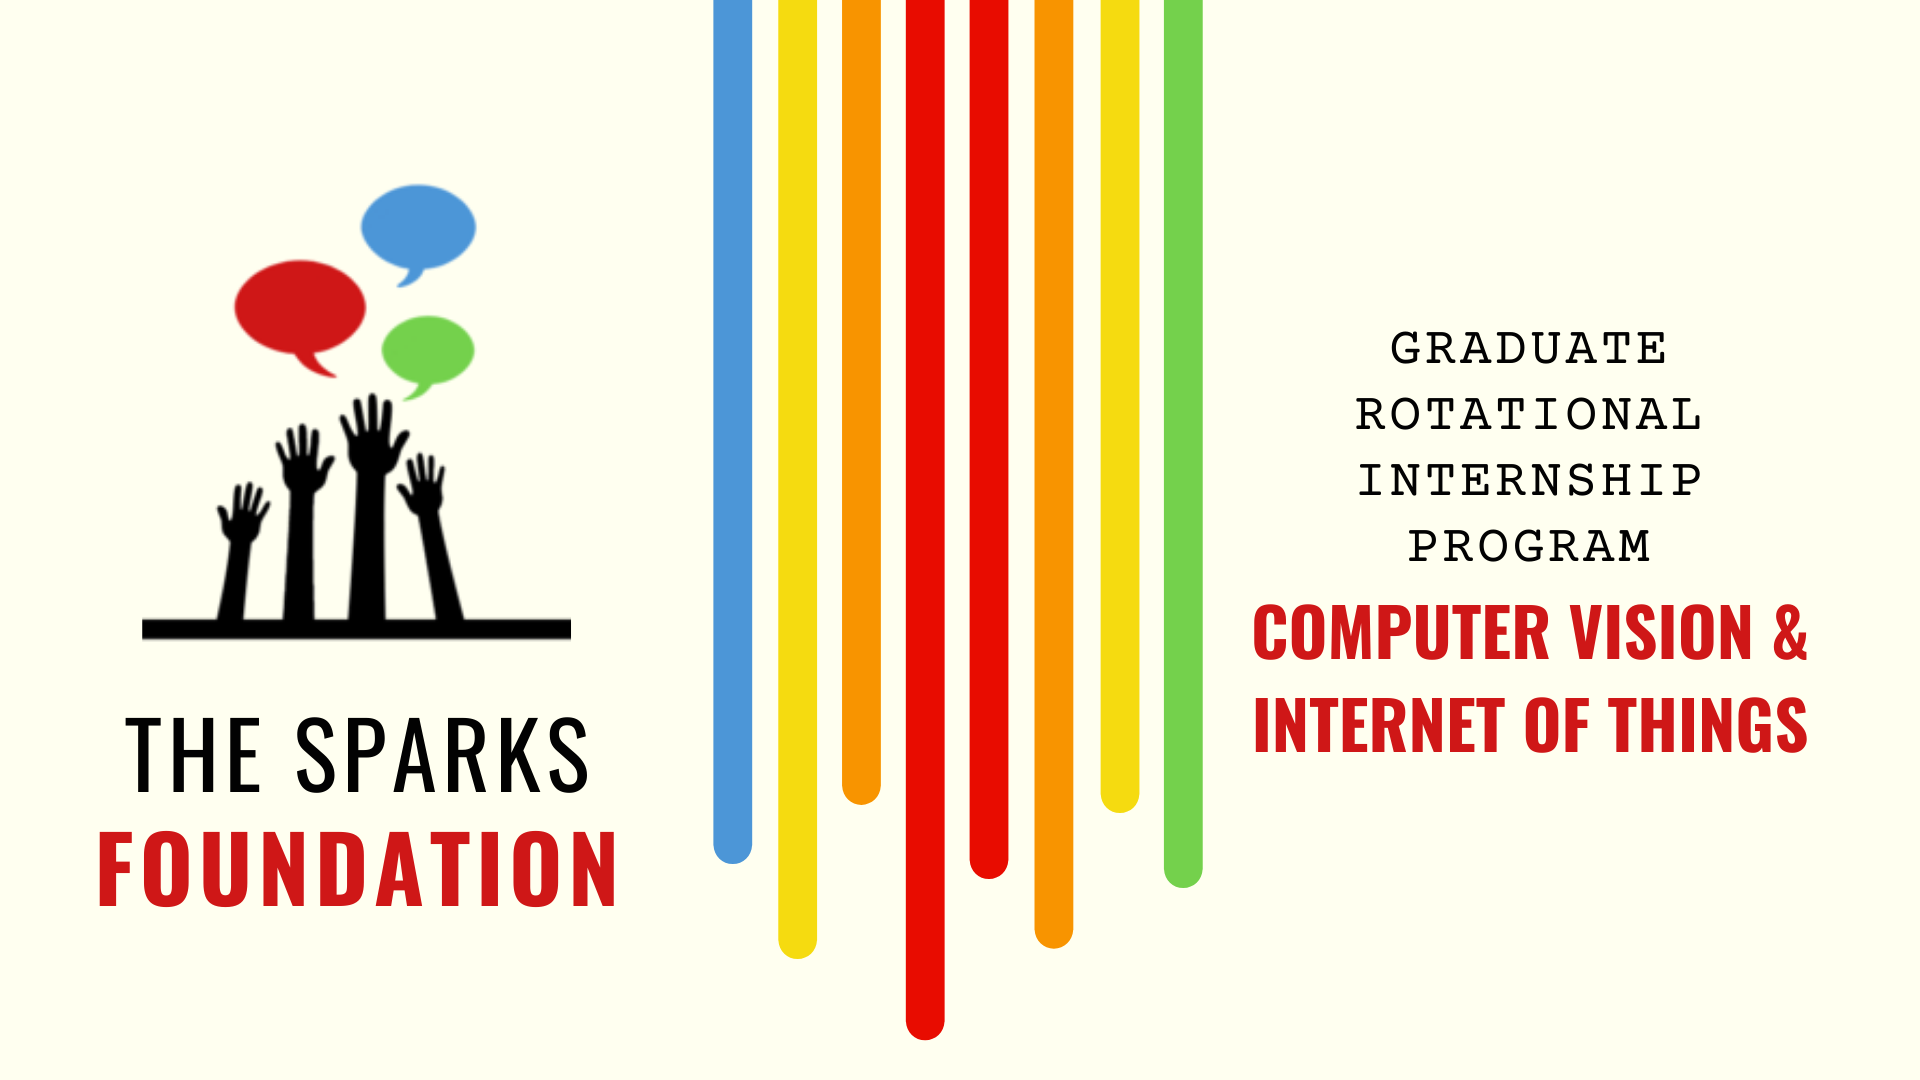

# Done By Mahadasu Gowtham Kishore

## Task:

### Color Identification in Images 

Implement an image color detector which identifies all the colors in an image or video.

(We will detect the color of the images)

#### Image Credit: Shivdeep Mishra


## Import libraries

In [1]:
# importing basic libraries
import matplotlib.pyplot as plt
import numpy as np

# importing Counter to extract the count
from collections import Counter

# importing OpenCV
import cv2

# importing Kmeans algorithm
from sklearn.cluster import KMeans

# importing rgb2lab to convert into lab to compare colors
# importing deltaE_cie76 to calculate the similarity
from skimage.color import rgb2lab, deltaE_cie76

# importing os to combine paths while reading files from a directory
import os

## Working with OpenCV

<img src="wild_port_image_1.jpg" alt="Drawing" style="width: 300px;"/>

The type of this input is <class 'numpy.ndarray'>
Shape: (6000, 4000, 3)


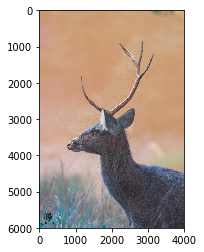

In [2]:
# to read image, using cv2.imread() with complete path which gets imported into the notebook as a Numpy array
image = cv2.imread('wild_port_image_1.jpg')

print(f"The type of this input is {type(image)}")
print(f"Shape: {image.shape}")

# plotting the image using pyplot's method imshow()
plt.imshow(image)

Here you can see the shape of the array is (6000, 4000, 3). The 
first two values matching the pixels of the image. And the third value is set to 3 as each pixel is represented as combination of three colors that are Red, Blue and Green. 

As OpenCV reads image in the sequence Blues Green Red (BG), the color of the image is looking a bit off. Now, we are going to convert the rendering to Red Green Blue (RGB), to view the actual image.

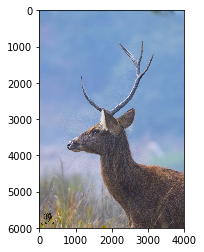

In [3]:
# converting the image rendering to a different color space using "cvtColor"
# using the "cv2.COLOR_BGR2RGB" to move from BGR to RGB color space

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

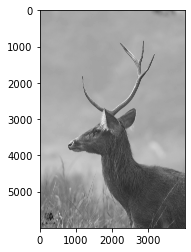

In [8]:
# black and image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

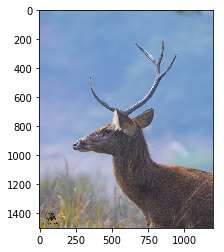

In [4]:
# resizing the image
resized_image = cv2.resize(image, (1200, 1500)) # second argument: width, height
plt.imshow(resized_image)

Now we are going to identify the colors from an image and displaying the top colors as a pie chart.

## Color Identification

#### RGB to Hex Conversion

In [6]:
# defining a function to convert from RGB to hex, to use them as labels for our pie chart.

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# {:02x} displays the hex value for the respective color

#### Read image in RGB color space

In [7]:
# defining method to get an image into RGB space

def get_image(image_path):
    image = cv2.imread(image_path) # reading the file
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # changing color space
    return image

#### Get colors from an image

Defining the complete code as a method to extract the top colors from the image and display them as a pie chart. 

    image: whose colors we wish to extract
    nummber_of_colors: total colors we want to extract
    show_chart:a boolean value to decide whether to show the pie chart or not

In [8]:
def get_colors(image, number_of_colors, show_chart):
    
    # resizing the image
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    
    # reshaping into two dimensions for KMeans
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    # instantiating KMeans algorithm
    clf = KMeans(n_clusters = number_of_colors)
    
    # fitting and predicting on the same image 
    labels = clf.fit_predict(modified_image)
    
    # getting count of all labels
    counts = Counter(labels)
    
    # finding colors
    center_colors = clf.cluster_centers_
    
    # getting ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        
    return rgb_colors

[array([145.80119523, 169.8753386 , 205.34488536]),
 array([177.91365918, 183.52184941, 207.51793923]),
 array([155.74037981, 151.33633183, 149.92320506]),
 array([68.8687982 , 60.93508997, 64.13370823]),
 array([146.26637951, 125.90535026,  93.22398549]),
 array([128.11881811, 125.34416038, 124.11371892]),
 array([94.4920239 , 83.17842841, 82.99277884]),
 array([122.00494367, 158.03312165, 203.57265657])]

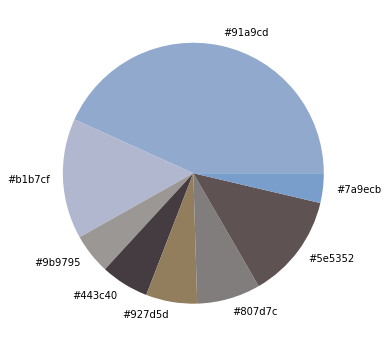

In [9]:
# identifying the top 8 colors of the image with plotting pie-chart
get_colors(get_image('wild_port_image_1.jpg'), 8, True)

[array([128.77566508, 118.19878906,  86.62367553]),
 array([243.43356098, 224.33120961, 171.9224458 ]),
 array([156.77489598, 142.66939827, 102.73580163]),
 array([254.35214715, 251.08539656, 239.66645685]),
 array([102.26181717,  86.66410256,  59.36298774]),
 array([219.6570966 , 196.1449422 , 137.82376749]),
 array([62.53402002, 53.92165965, 35.60017409]),
 array([190.06756172, 168.02587325, 115.82159518])]

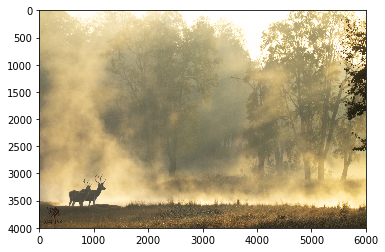

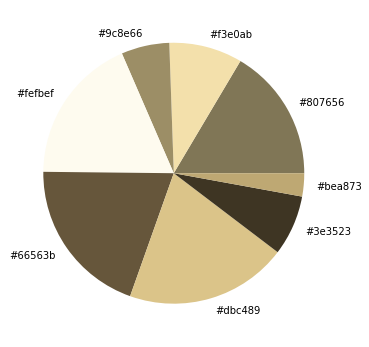

In [10]:
plt.imshow(get_image('images\\wild_port_image_2.jpg'))
get_colors(get_image('images\\wild_port_image_2.jpg'), 8, True)

[array([4.17686476, 3.24661025, 1.00962658]),
 array([231.27854964, 214.15791257, 183.329041  ]),
 array([168.97903001, 123.57165573,  62.89982111]),
 array([44.82026935, 35.80793675, 14.09449951]),
 array([200.58908871, 165.21701677, 109.10367236]),
 array([17.79788531, 14.79894117,  6.62047171]),
 array([121.73260397,  89.64105864,  43.5098544 ]),
 array([79.15756614, 62.09142857, 25.85518519])]

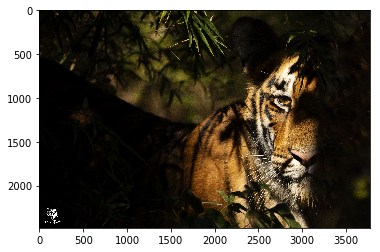

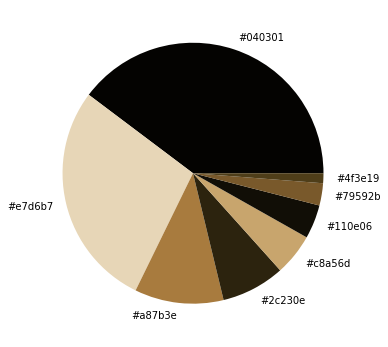

In [11]:
plt.imshow(get_image('images\\wild_port_image_3.jpg'))
get_colors(get_image('images\\wild_port_image_3.jpg'), 8, True)

[array([11.12638139, 10.08674929,  9.43582954]),
 array([189.40030166, 159.94720965, 103.89924585]),
 array([155.16059787, 117.96788043,  61.73541104]),
 array([2.69784829, 2.31031541, 2.23536103]),
 array([232.84759358, 229.90909091, 222.95187166]),
 array([46.14030746, 27.62999625, 11.15155606]),
 array([117.56980377,  81.93463317,  37.66766654]),
 array([82.8602219 , 51.80356493, 18.32393598])]

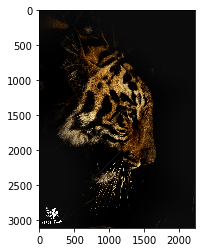

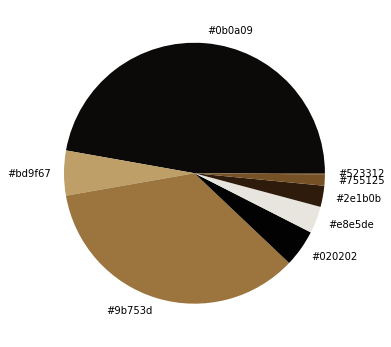

In [12]:
plt.imshow(get_image('images\\wild_port_image_4.jpg'))
get_colors(get_image('images\\wild_port_image_4.jpg'), 8, True)

[array([186.1592521 , 146.97567877,  81.55322731]),
 array([244.15826717, 215.79366586, 159.85585663]),
 array([211.40057736, 175.00423751, 102.51009058]),
 array([253.69231113, 250.65688599, 243.68095004]),
 array([102.48279356,  75.23909278,  41.88953887]),
 array([229.7603149 , 196.34264441, 127.88089254]),
 array([143.15602559, 106.22594333,  57.00208905]),
 array([252.21855465, 234.98004397, 199.88964072])]

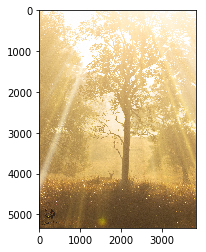

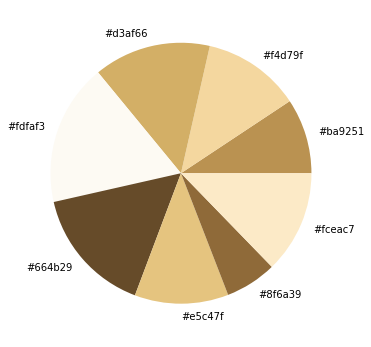

In [13]:
plt.imshow(get_image('images\\wild_port_image_5.jpg'))
get_colors(get_image('images\\wild_port_image_5.jpg'), 8, True)

[array([154.49308815, 170.55957968, 113.37765252]),
 array([178.92896175, 112.23421896,  45.01959676]),
 array([65.25954129, 50.04596138, 26.28873176]),
 array([79.80039812, 97.06373359, 64.30061743]),
 array([117.15564675, 142.45785834,  64.09553124]),
 array([106.01591507, 122.27556027,  83.85917815]),
 array([191.21823252, 197.58629716, 127.9137882 ]),
 array([133.3981957 , 149.93494864,  94.81246665])]

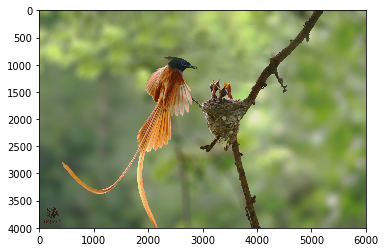

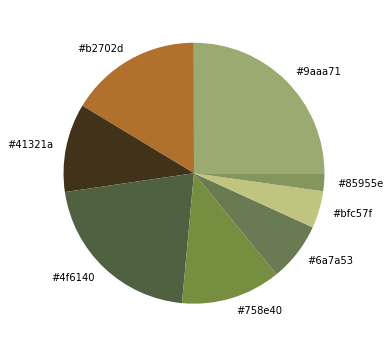

In [14]:
plt.imshow(get_image('images\\wild_port_image_6.jpg'))
get_colors(get_image('images\\wild_port_image_6.jpg'), 8, True)

[array([60.80507795, 69.04516704, 55.9918931 ]),
 array([199.7083378 , 208.74911471, 192.04818114]),
 array([106.97468223, 129.47925147,  64.12544654]),
 array([125.76194319, 159.03030591,  30.9715452 ]),
 array([160.67699282, 176.44209377, 127.76984427]),
 array([133.24286351, 153.33256517,  89.03444345]),
 array([20.03012143, 24.66564826, 27.64559342]),
 array([ 89.30695352, 122.95268866,  19.42415488])]

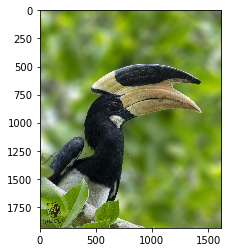

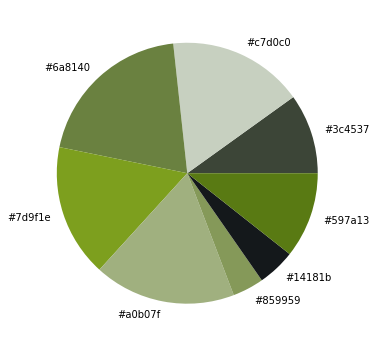

In [15]:
plt.imshow(get_image('images\\wild_port_image_7.jpg'))
get_colors(get_image('images\\wild_port_image_7.jpg'), 8, True)

[array([140.78726227,  88.24266549,  51.66261241]),
 array([172.60058522, 187.42888494, 102.36315184]),
 array([173.12479685, 157.55420312, 131.77056606]),
 array([207.32407666, 218.63996651, 149.44618104]),
 array([146.55081349, 125.95714716,  93.63259034]),
 array([184.2881815 , 177.43248347, 162.70145619]),
 array([218.02749173, 221.58086762, 205.27077023]),
 array([64.61965539, 46.86119974, 34.88672623])]

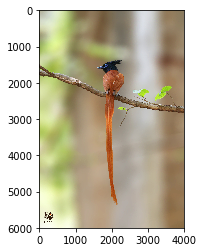

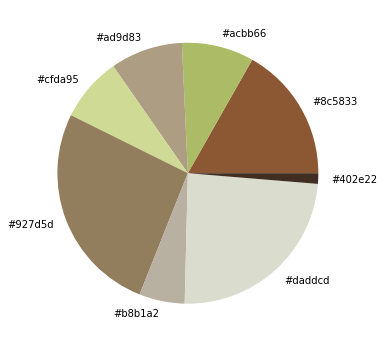

In [16]:
plt.imshow(get_image('images\\wild_port_image_8.jpg'))
get_colors(get_image('images\\wild_port_image_8.jpg'), 8, True)

[array([88.28941002, 82.2251202 , 75.85563519]),
 array([162.82384824, 145.80532972, 139.13369467]),
 array([47.97568587, 44.40874543, 39.16041583]),
 array([18.23369794,  8.49768616,  7.05069415]),
 array([73.75238867, 64.11870983, 56.12617986]),
 array([177.63616236,  68.60369004,  61.74907749]),
 array([94.34019377, 96.0745797 , 99.31476828]),
 array([221.58386684, 218.19398207, 214.30153649])]

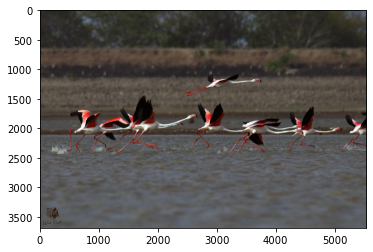

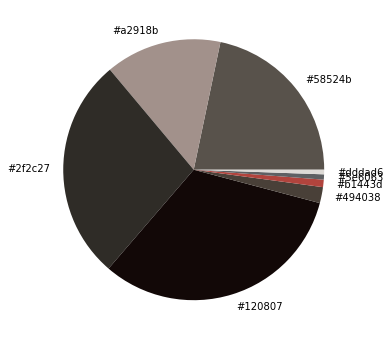

In [38]:
plt.imshow(get_image('images\\wild_port_image_9.jpg'))
get_colors(get_image('images\\wild_port_image_9.jpg'), 8, True)

[array([223.6732866 , 225.95872274, 205.63746106]),
 array([21.86029149, 26.24023872, 13.46254047]),
 array([ 98.5019678 , 100.87227191,  88.95205725]),
 array([138.83666667, 170.79648148,  68.67064815]),
 array([29.09542073, 41.4347731 , 17.46543026]),
 array([56.76119403, 58.2880597 , 43.02356077]),
 array([171.65759458, 196.79717674, 120.9160926 ]),
 array([103.70686767, 127.85607525,  34.01546193])]

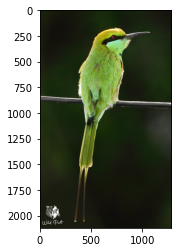

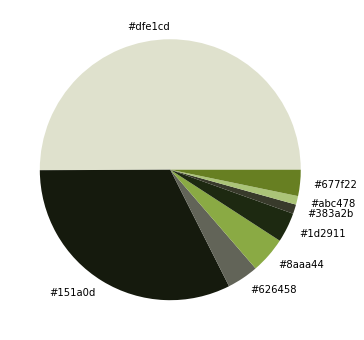

In [39]:
plt.imshow(get_image('images\\wild_port_image_10.jpg'))
get_colors(get_image('images\\wild_port_image_10.jpg'), 8, True)

[array([186.33648618, 208.93317761, 243.38132802]),
 array([ 50.0097351 ,  73.37516556, 131.58993377]),
 array([115.84365409, 146.07641271, 204.38377866]),
 array([15.26609591, 25.93518251, 44.57540348]),
 array([ 75.77449006, 108.87910356, 187.44576731]),
 array([27.57408708, 46.7029996 , 94.43072833]),
 array([ 5.83682666, 11.60522282, 11.80972141]),
 array([152.78742693, 177.548081  , 221.83766839])]

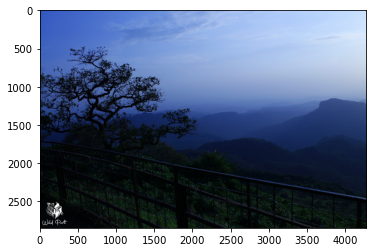

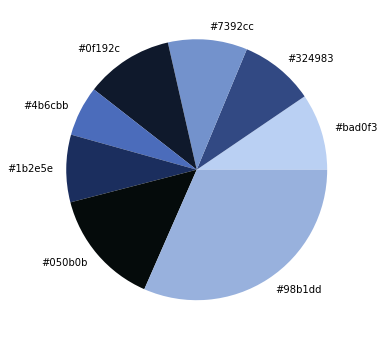

In [40]:
plt.imshow(get_image('images\\wild_port_image_11.jpg'))
get_colors(get_image('images\\wild_port_image_11.jpg'), 8, True)

[array([65.56607804, 56.70323697, 52.79772303]),
 array([29.25887012, 37.43005368, 40.76610369]),
 array([170.0001934 , 122.53274507,  80.3109392 ]),
 array([ 14.72913713,  85.08864947, 115.21850487]),
 array([106.9227587 ,  80.83940074,  62.74720761]),
 array([209.04078014, 221.56560284, 199.12056738]),
 array([201.22198651, 148.21749891,  87.72399913]),
 array([141.84236958, 103.59112432,  71.53752178])]

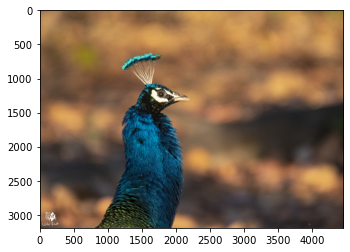

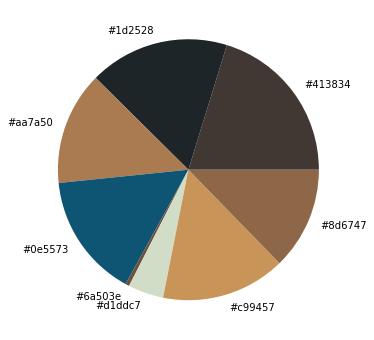

In [41]:
plt.imshow(get_image('images\\wild_port_image_12.jpg'))
get_colors(get_image('images\\wild_port_image_12.jpg'), 8, True)

[array([137.8278437 , 125.14649235, 112.53522148]),
 array([114.94272619, 106.00840882, 101.7941824 ]),
 array([76.52890124, 71.40383055, 79.62149337]),
 array([164.38569781, 147.49265667, 128.73633218]),
 array([ 16.78011276,  69.50820092, 171.93054844]),
 array([ 95.16290603, 144.83015125, 175.76345152]),
 array([95.43628168, 88.90105449, 91.38771539]),
 array([182.06478307, 172.54982858, 175.40052016])]

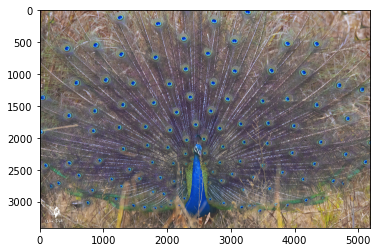

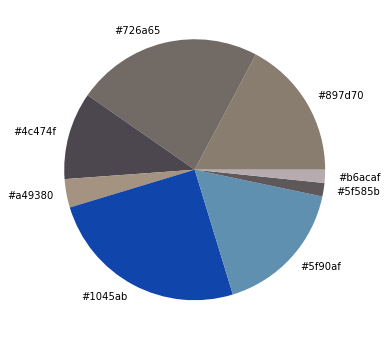

In [42]:
plt.imshow(get_image('images\\wild_port_image_13.jpg'))
get_colors(get_image('images\\wild_port_image_13.jpg'), 8, True)

## Search Images using color

From the model above, we can extract the major colors. We will select a color and if it's hex matches or is close to the hex of the of the major colors of the image, we say it's a match.

#### Get all images

In [14]:
IMAGE_DIRECTORY = 'images' # images are in the folder images

COLORS = {
    'GREEN':[0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED': [255, 0, 0],
    'BLACK': [0, 0, 0]
} # dictionary of colors

images = [] # will save values in this list after reading the images

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

#### Show all images

Let's see all the images in the folder

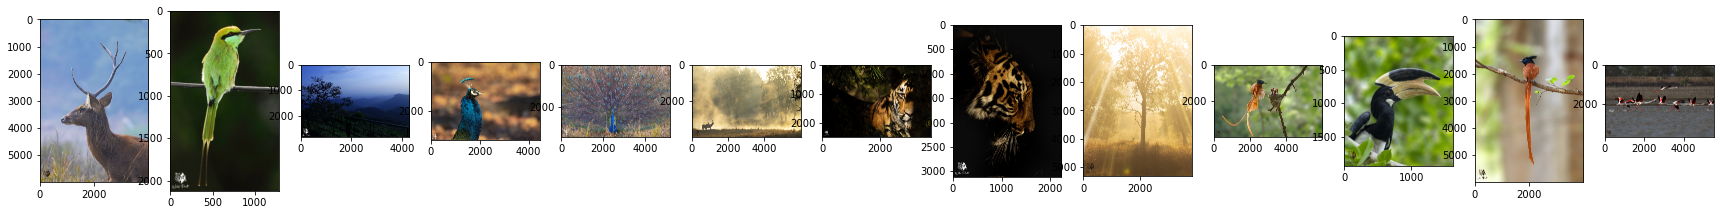

In [15]:
plt.figure(figsize=(30,10))

for i in range(len(images)):

    # splitting the area into subplots equal to number of images
    plt.subplot(1, len(images), i+1)
    
    plt.imshow(images[i])

#### Match Images with color

Defining method "match_image_by_color" to filter all images that match the selected color.

In [16]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10):
    
    # extracting the image colors in RGB format
    image_colors = get_colors(image, number_of_colors, False)
    
    # using rgb2lab to convert the selected color comparable format
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    
    # iterating over all the colors retrieved from image
    select_image = False
   
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        
        if (diff < threshold):
            select_image = True
            
    return select_image

#### Show selected images

Defining function "show_selected_images" to iterate over all images, it filter them based on color and displays on the screen using "imshow"

In [17]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                       color,
                                       threshold,
                                       colors_to_match)
        
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

### Filter Results

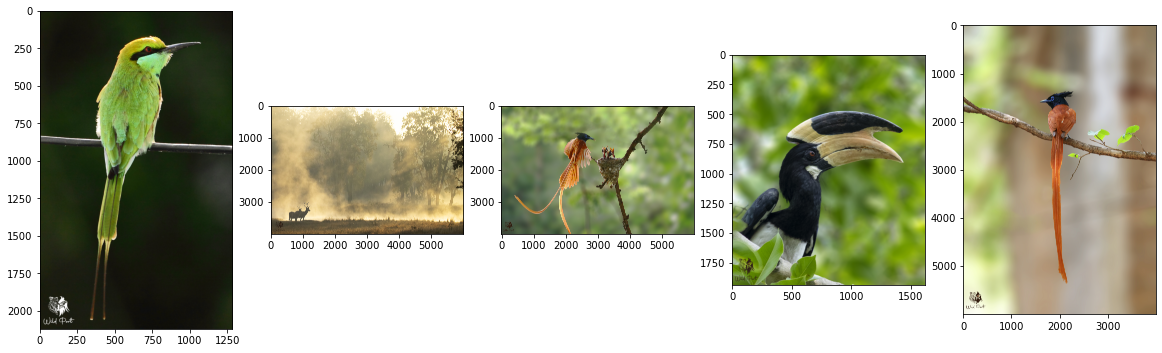

In [18]:
# search for GREEN

plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['GREEN'], 60, 5)

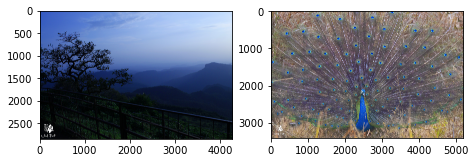

In [19]:
# search for BLUE

plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['BLUE'], 70, 5)

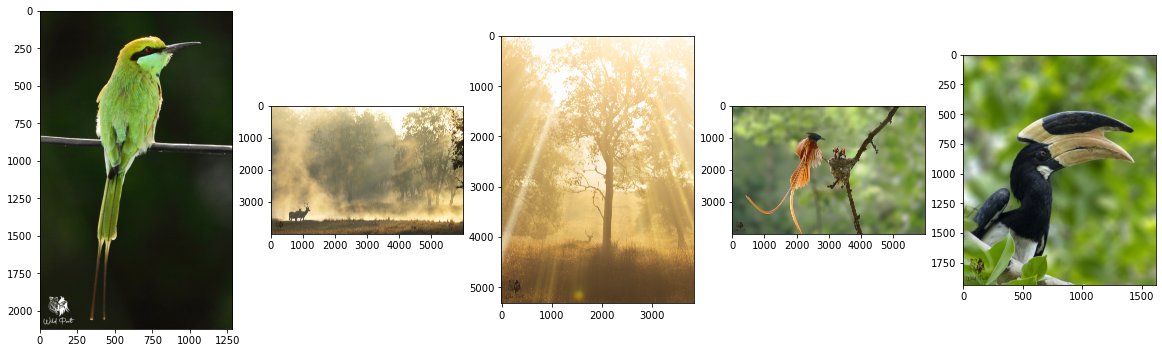

In [21]:
# search for YELLOW

plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['YELLOW'], 70, 5)

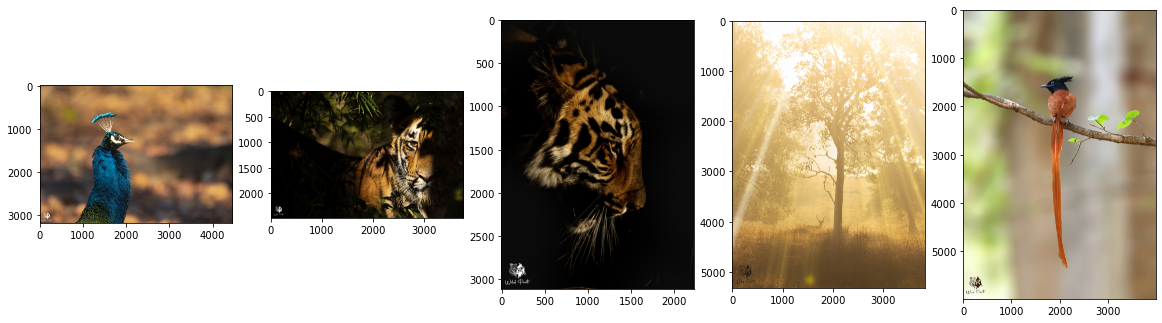

In [22]:
# search for RED

plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['RED'], 80, 5)

## Conclusion

In this project, we used KMeans to extract majority colors from images. We then used the RGB Values of Colors to identify images from a collection that have that color in them.